In [ ]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
import scipy.misc
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import datasets, layers, models, optimizers, regularizers
from keras.preprocessing.image import img_to_array, array_to_img, load_img
from tensorflow.keras.applications.densenet import DenseNet169

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)]
    return Y

In [ ]:
def load_dataset():
    train_dataset = h5py.File('/content/drive/My Drive/Datasets/SIRI-WHU/Train_SIRI-WHU.h5', 'r')
    train_set_x_orig = np.array(train_dataset["X_train_dataset"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["Y_train_dataset"][:]) # your train set labels

    test_dataset = h5py.File('/content/drive/My Drive/Datasets/SIRI-WHU/Test_SIRI-WHU.h5', 'r')
    test_set_x_orig = np.array(test_dataset["X_test_dataset"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["Y_test_dataset"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [ ]:
# Loading the data (Dataset)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

y = 2


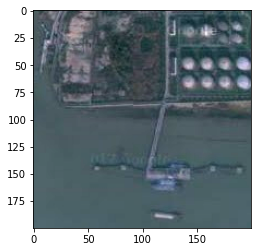

In [ ]:
#for i in range(X_train_orig.shape[0]):
#  X_train_orig[i] = Image.fromarray(X_train_orig[i].astype(np.uint8)).convert(mode='HSV')
#  X_train_orig[i] = Image.fromarray(X_train_orig[i].astype(np.uint8)).convert(mode='YCbCr')

#for j in range(X_test_orig.shape[0]):
#  X_test_orig[j] = Image.fromarray(X_test_orig[j].astype(np.uint8)).convert(mode='HSV')
#  X_test_orig[j] = Image.fromarray(X_test_orig[j].astype(np.uint8)).convert(mode='YCbCr')

index = 50
plt.imshow(array_to_img(X_train_orig[index]))
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [ ]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 12)
Y_test = convert_to_one_hot(Y_test_orig, 12)

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1920
number of test examples = 480
X_train shape: (1920, 200, 200, 3)
Y_train shape: (1920, 12)
X_test shape: (480, 200, 200, 3)
Y_test shape: (480, 12)


In [ ]:
Desnet_Out = h5py.File('/content/drive/My Drive/Datasets/SIRI-WHU/Convout/TLB1000/Desnet_Out.h5', 'r')
Txtrain = np.array(Desnet_Out["train_OutDesnet"][:])
Txtest = np.array(Desnet_Out["test_OutDesnet"][:])
Desnet_Out.close()

print("Txtrain Shape:", Txtrain.shape)
print("Txtest Shape:", Txtest.shape)

Txtrain Shape: (1920, 1664)
Txtest Shape: (480, 1664)


In [ ]:
model = models.Sequential()
model.add(layers.Input(shape = (1664)))
#model.add(layers.ReLU())
#model.add(layers.Dropout(0.77))
model.add(layers.Dense(12, activation='softmax'))
print(model.summary())

#optimizers.SGD(learning_rate=0.01, momentum=0.9, name="SGD", decay=1e-4)
optimizers.Adam(learning_rate=0.001, name="Adam")
model.compile(optimizer='Adam', loss="categorical_crossentropy", metrics=['accuracy'])

Vhistory = model.fit(Txtrain, Y_train, epochs=100, batch_size=256, validation_split = 0.25)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                19980     
Total params: 19,980
Trainable params: 19,980
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
6/6 [==============================] - 0s 29ms/step - loss: 2.7414 - accuracy: 0.0979 - val_loss: 2.2749 - val_accuracy: 0.2417
Epoch 2/100
6/6 [==============================] - 0s 7ms/step - loss: 2.1108 - accuracy: 0.3264 - val_loss: 1.7604 - val_accuracy: 0.5104
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 1.6076 - accuracy: 0.5500 - val_loss: 1.3811 - val_accuracy: 0.6292
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 1.2454 - accuracy: 0.6972 - val_loss: 1.1178 - val_accuracy: 0.7063
Epoch 5/100
6/6 [==============================] - 0s 7ms/step - loss: 0.9940 - accu

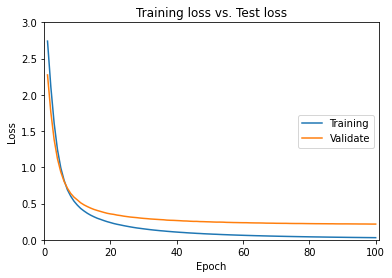

In [ ]:
epochs = len(Vhistory.history['loss'])
max_loss = max(max(Vhistory.history['loss']), max(Vhistory.history['val_loss']))
plt.axis([0, epochs+1, 0, round(max_loss * 2.0) / 2 + 0.5])
x = np.arange(1, epochs+1)
plt.plot(x, Vhistory.history['loss'])
plt.plot(x, Vhistory.history['val_loss'])
plt.title('Training loss vs. Test loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validate'], loc='right')
plt.show()

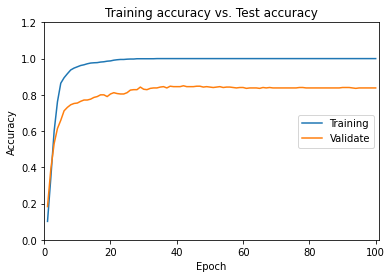

In [ ]:
epochs = len(Vhistory.history['accuracy'])
plt.axis([0, epochs+1, 0, 1.2])
x = np.arange(1, epochs+1)
plt.plot(x, Vhistory.history['accuracy'])
plt.plot(x, Vhistory.history['val_accuracy'])
plt.title('Training accuracy vs. Test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validate'], loc='right')
plt.show()

In [ ]:
epochs = np.argmin(Vhistory.history['val_loss']) + 1

history = model.fit(Txtrain, Y_train, epochs=epochs, verbose=1, batch_size=256)

train_loss, train_acc = model.evaluate(Txtrain,  Y_train, verbose=1)
print("Loss: ", train_loss, " Trin Accuracy: ", train_acc)

test_loss, test_acc = model.evaluate(Txtest,  Y_test, verbose=1)
print("Loss: ", test_loss, " Test Accuracy: ", test_acc)

Epoch 1/98
7/7 [==============================] - 0s 5ms/step - loss: 0.1241 - accuracy: 0.9601
Epoch 2/98
7/7 [==============================] - 0s 5ms/step - loss: 0.0982 - accuracy: 0.9714
Epoch 3/98
7/7 [==============================] - 0s 5ms/step - loss: 0.0794 - accuracy: 0.9815
Epoch 4/98
7/7 [==============================] - 0s 4ms/step - loss: 0.0630 - accuracy: 0.9905
Epoch 5/98
7/7 [==============================] - 0s 5ms/step - loss: 0.0524 - accuracy: 0.9940
Epoch 6/98
7/7 [==============================] - 0s 5ms/step - loss: 0.0448 - accuracy: 0.9958
Epoch 7/98
7/7 [==============================] - 0s 6ms/step - loss: 0.0401 - accuracy: 0.9970
Epoch 8/98
7/7 [==============================] - 0s 5ms/step - loss: 0.0351 - accuracy: 0.9982
Epoch 9/98
7/7 [==============================] - 0s 5ms/step - loss: 0.0324 - accuracy: 0.9988
Epoch 10/98
7/7 [==============================] - 0s 5ms/step - loss: 0.0298 - accuracy: 0.9988
Epoch 11/98
7/7 [======================

In [ ]:
import pandas as pd

array1 = np.zeros((100,2))
array1[:,0] = Vhistory.history['loss']
array1[:,1] = Vhistory.history['val_loss']

array2 = np.zeros((100,2))
array2[:,0] = Vhistory.history['accuracy']
array2[:,1] = Vhistory.history['val_accuracy']

df1 = pd.DataFrame(array1)
df1.to_excel("/content/drive/My Drive/DnsSL.xlsx", sheet_name='Mrcd Loss')

df2 = pd.DataFrame(array2)
df2.to_excel("/content/drive/My Drive/DnsSA.xlsx", sheet_name='Mrcd accuracy')
